
<!DOCTYPE html>
<html>
  <head>
    <meta charset="UTF-8">
    <title>Trading Strategy Parameter Optimization</title>
    <style>
      body {
        font-family: Arial, sans-serif;
        background-color: #f5f5f5;
        margin: 20px;
        text-align: center;
      }
      h1 {
        color: #2c3e50;
        font-size: 2.5em;
      }
      h2 {
        color: #34495e;
        font-size: 2em;
        margin-top: 0.2em;
      }
      p {
        color: #2c3e50;
        font-size: 1.2em;
      }
    </style>
  </head>
  <body>
    <h1>Optimizing Trading Strategy Parameters</h1>
    <h2>Machine Learning &amp; Optuna on Microsoft Stock</h2>
    <p>
      A project to identify the best parameters for EMA (5m &amp; 1h), ADX, stop loss, and target levels.
    </p>
  </body>
</html>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf
import numpy as np
import requests
import ta
import optuna

In [3]:
TICKER = 'MSFT'
START_DATE = "2025-01-20"    # Start date for historical data
END_DATE = "2025-03-15"      # End date for historical data
INTERVAL_5M = "5m" 

In [6]:
df= yf.download(tickers = TICKER, start = START_DATE , end = END_DATE,interval = INTERVAL_5M)
df.dropna(inplace=True)  
df.sort_index(inplace=True) 
df.index=df.index.tz_convert('US/Eastern')
df
df_1h = yf.download(tickers = TICKER, start = START_DATE , end = END_DATE,interval = '1h')
df_1h.dropna(inplace=True)  
df_1h.sort_index(inplace=True) 
df_1h.index=df_1h.index.tz_convert('US/Eastern')
df_1h

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Datetime,,,,,
2025-01-21 09:30:00-05:00,428.470001,430.790009,425.595001,430.040009,4607395
2025-01-21 10:30:00-05:00,428.010010,428.939911,427.010010,428.420013,1321631
2025-01-21 11:30:00-05:00,428.559998,428.950012,427.709991,428.003998,1260019
2025-01-21 12:30:00-05:00,429.359985,430.899902,428.549988,428.559998,1471297
2025-01-21 13:30:00-05:00,429.260010,429.519989,427.420013,429.359985,1975165
...,...,...,...,...,...
2025-03-14 11:30:00-04:00,386.184998,387.399994,385.070007,385.279999,1850065
2025-03-14 12:30:00-04:00,387.690002,388.299988,385.903503,386.095001,1332648


In [7]:
df['EMA_5m'] = df['Close'].ewm(span = 21, adjust = False).mean()
df['EMA_1h']=df_1h['Close'].ewm(span = 21 , adjust=False).mean()
df['EMA_1h'] = df['EMA_1h'].ffill()
df

Price,Close,High,Low,Open,Volume,EMA_5m,EMA_1h
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,,
Datetime,,,,,,,
2025-01-21 09:30:00-05:00,429.179993,430.790009,428.570007,430.040009,2070534,429.179993,428.470001
2025-01-21 09:35:00-05:00,427.769989,430.040009,427.750000,429.190002,230448,429.051811,428.470001
2025-01-21 09:40:00-05:00,426.359985,427.820007,426.045013,427.820007,396190,428.807099,428.470001
2025-01-21 09:45:00-05:00,427.111206,427.489990,426.100006,426.369995,316215,428.652927,428.470001
2025-01-21 09:50:00-05:00,425.910004,427.929993,425.595001,427.450012,328695,428.403570,428.470001
...,...,...,...,...,...,...,...
2025-03-14 15:35:00-04:00,388.033691,388.440002,387.970001,388.228394,172073,387.936312,384.103063
2025-03-14 15:40:00-04:00,388.410004,388.475006,387.959991,388.035004,183960,387.979375,384.103063


In [8]:
df.columns = df.columns.droplevel(1)
df = df.reset_index()
df = df[['Datetime', 'Open', 'Close', 'High', 'Low', 'Volume', 'EMA_5m','EMA_1h']]
df
df_1h.columns = df_1h.columns.droplevel(1)
df_1h = df_1h.reset_index()
df_1h = df_1h[['Datetime', 'Open', 'Close', 'High', 'Low', 'Volume']]
df_1h.index

RangeIndex(start=0, stop=266, step=1)

In [9]:
df = df.set_index('Datetime')
df.index
df_1h = df_1h.set_index('Datetime')
df_1h.index

DatetimeIndex(['2025-01-21 09:30:00-05:00', '2025-01-21 10:30:00-05:00',
               '2025-01-21 11:30:00-05:00', '2025-01-21 12:30:00-05:00',
               '2025-01-21 13:30:00-05:00', '2025-01-21 14:30:00-05:00',
               '2025-01-21 15:30:00-05:00', '2025-01-22 09:30:00-05:00',
               '2025-01-22 10:30:00-05:00', '2025-01-22 11:30:00-05:00',
               ...
               '2025-03-13 13:30:00-04:00', '2025-03-13 14:30:00-04:00',
               '2025-03-13 15:30:00-04:00', '2025-03-14 09:30:00-04:00',
               '2025-03-14 10:30:00-04:00', '2025-03-14 11:30:00-04:00',
               '2025-03-14 12:30:00-04:00', '2025-03-14 13:30:00-04:00',
               '2025-03-14 14:30:00-04:00', '2025-03-14 15:30:00-04:00'],
              dtype='datetime64[ns, US/Eastern]', name='Datetime', length=266, freq=None)

In [10]:
high = df['High']   # This is already a Series (1D)
low = df['Low']
close = df['Close']

# Calculate ADX with a 14-period window using the ta library
df['ADX'] = ta.trend.adx(high=high, low=low, close=close, window=9, fillna=False)

df

Price,Open,Close,High,Low,Volume,EMA_5m,EMA_1h,ADX
Datetime,,,,,,,,
2025-01-21 09:30:00-05:00,430.040009,429.179993,430.790009,428.570007,2070534,429.179993,428.470001,0.000000
2025-01-21 09:35:00-05:00,429.190002,427.769989,430.040009,427.750000,230448,429.051811,428.470001,0.000000
2025-01-21 09:40:00-05:00,427.820007,426.359985,427.820007,426.045013,396190,428.807099,428.470001,0.000000
2025-01-21 09:45:00-05:00,426.369995,427.111206,427.489990,426.100006,316215,428.652927,428.470001,0.000000
2025-01-21 09:50:00-05:00,427.450012,425.910004,427.929993,425.595001,328695,428.403570,428.470001,0.000000
...,...,...,...,...,...,...,...,...
2025-03-14 15:35:00-04:00,388.228394,388.033691,388.440002,387.970001,172073,387.936312,384.103063,27.109141
2025-03-14 15:40:00-04:00,388.035004,388.410004,388.475006,387.959991,183960,387.979375,384.103063,27.743896
2025-03-14 15:45:00-04:00,388.369995,388.699585,388.910004,388.290009,263267,388.044849,384.103063,30.874299


In [12]:
def signal_generator_momentum_5m(df, adx_threshold):
    df['signal_momentum_5m'] = 0
    for i in range(1, len(df)):
        current_high = df['High'].iloc[i]
        prev_high = df['High'].iloc[i-1]
        prev_range = df['High'].iloc[i-1] - df['Low'].iloc[i-1]
        hightoclose = df['High'].iloc[i] - df['Close'].iloc[i]
        closetoprevlow = df['Close'].iloc[i] - df['Low'].iloc[i-1]
        
        if (  (df['Close'].iloc[i] <df['Open'].iloc[i])  & (df['High'].iloc[i] >= df['EMA_5m'].iloc[i])&(df['Close'].iloc[i] 
                < df['EMA_5m'].iloc[i]) &(df['Low'].iloc[i] > df['EMA_1h'].iloc[i])& (df['Low'].iloc[i-4:i-1] < df['EMA_5m'].iloc[i-4:i-1])
           &(df['ADX'].iloc[i] >= adx_threshold)).all():
                df.at[df.index[i], 'signal_momentum_5m']=1
    return df   

In [13]:
def backtest_strategy_1(data, stop_loss_multiplier, take_profit_multiplier):
    trades = []
    entry_signals = data[data['signal_momentum_5m'] == 1].index
    
    for entry_time in entry_signals:
        
        entry_idx = data.index.get_loc(entry_time)
        prev_Range = df['High'].iloc[entry_idx-1] - df['Low'].iloc[entry_idx-1]
        if entry_idx == 0:
            continue  # Skip first index to have previous candle
         
        # Entry price (signal candle's high)
        entry_price = data.iloc[entry_idx]['Close']
        
        # Initial stop loss (previous candle's low)
        initial_stop =entry_price + (prev_Range * stop_loss_multiplier) #data.iloc[entry_idx]['High']
        risk = entry_price - initial_stop          #negative quantity 
        tp = entry_price + (risk * take_profit_multiplier)
        
        # Trade tracking logic
        exit_price = None
        for j in range(entry_idx+1, len(data)):
            current = data.iloc[j]
            if current['High'] >= initial_stop:
                exit_price = initial_stop
                break
            if current['Low'] <= tp:
                exit_price = tp
                break
        if exit_price is None:
            exit_price = data.iloc[-1]['Close']
        
        pnl = entry_price - exit_price
        rrr = (exit_price - entry_price) / risk if risk != 0 else 0
        trades.append({'rrr': rrr})
    
    return pd.DataFrame(trades)

In [14]:
def objective(trial):
    # Suggest hyperparameters
    params = {
        'adx_window': trial.suggest_int('adx_window', 5, 20),
        'adx_threshold': trial.suggest_int('adx_threshold', 10, 30),
        'ema_5m_span': trial.suggest_int('ema_5m_span', 10, 50),
        'ema_1h_span': trial.suggest_int('ema_1h_span', 10, 50),
        'stop_loss_multiplier': trial.suggest_float('stop_loss_multiplier', 0.5, 2.0),
        'take_profit_multiplier': trial.suggest_float('take_profit_multiplier', 1.0, 3.0)
    }
    
    # Prepare data with current parameters
    df_copy = df.copy()
    df_1h_copy = df_1h.copy()
    
    # Calculate indicators
    df_copy['EMA_5m'] = df_copy['Close'].ewm(span=params['ema_5m_span'], adjust=False).mean()
    df_1h_copy['EMA_1h'] = df_1h_copy['Close'].ewm(span=params['ema_1h_span'], adjust=False).mean()
    df_copy['EMA_1h'] = df_1h_copy['EMA_1h'].reindex(df.index).ffill()
    df_copy['ADX'] = ta.trend.adx(
        high=df['High'], low=df['Low'], close=df['Close'],
        window=params['adx_window'], fillna=False
    )
    
    # Generate signals
    df_copy = signal_generator_momentum_5m(df_copy, params['adx_threshold'])
    
    # Backtest if signals exist
    if df_copy['signal_momentum_5m'].sum() == 0:
        return -np.inf  # Penalize no trades
    
    trades = backtest_strategy_1(
        df_copy, params['stop_loss_multiplier'], params['take_profit_multiplier']
    )
    
    if trades.empty:
        return -np.inf
    
    # Maximize total RRR
    return trades['rrr'].sum()

In [15]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Best parameters
print("Best parameters:", study.best_params)
print("Best RRR:", study.best_value)

[I 2025-03-18 20:20:09,049] A new study created in memory with name: no-name-3bb6d3a3-f723-47ab-b67e-ff4fe5a5aa8c


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-03-18 20:20:12,689] Trial 0 finished with value: 4.9109705077186865 and parameters: {'adx_window': 18, 'adx_threshold': 16, 'ema_5m_span': 28, 'ema_1h_span': 42, 'stop_loss_multiplier': 1.497426993682821, 'take_profit_multiplier': 1.3555427734289647}. Best is trial 0 with value: 4.9109705077186865.
[I 2025-03-18 20:20:16,294] Trial 1 finished with value: -10.993370530232202 and parameters: {'adx_window': 14, 'adx_threshold': 20, 'ema_5m_span': 11, 'ema_1h_span': 33, 'stop_loss_multiplier': 1.339473159572504, 'take_profit_multiplier': 1.5838857891473195}. Best is trial 0 with value: 4.9109705077186865.
[I 2025-03-18 20:20:19,706] Trial 2 finished with value: -3.8134112621228287 and parameters: {'adx_window': 19, 'adx_threshold': 17, 'ema_5m_span': 32, 'ema_1h_span': 16, 'stop_loss_multiplier': 0.6572628135932839, 'take_profit_multiplier': 1.7966471844693102}. Best is trial 0 with value: 4.9109705077186865.
[I 2025-03-18 20:20:23,045] Trial 3 finished with value: -9.3600739301460

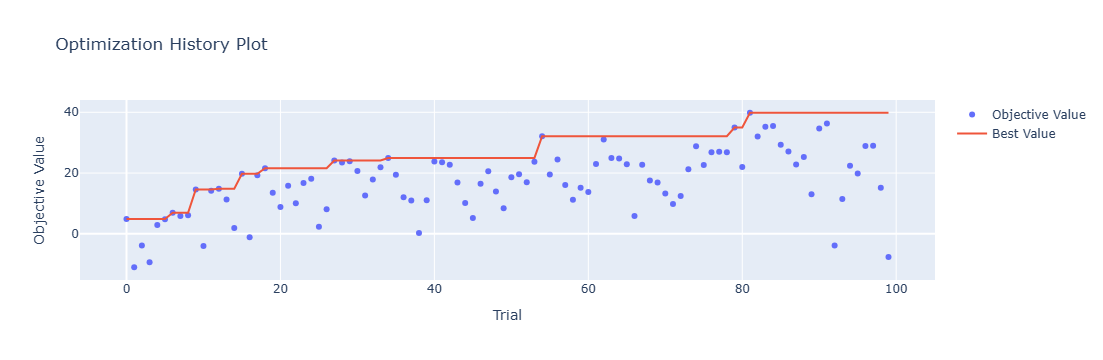

In [36]:
from optuna.visualization import plot_optimization_history
fig = plot_optimization_history(study)
fig.show()  
